<a href="https://colab.research.google.com/github/y001003/yeardream/blob/main/DL/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D_4%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4장 신경망 학습

학습 : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것  


## 4.1 데이터 학습

신경망에는 설정해야하는 매개변수(가중치, 편향)이 적게는 수백개에서 수억개에 다를 수 있을 것이다. 이런 매개변수를 사람이 매번 코딩을 통해 수작업을 하는 것은 매우 비효율적이다. **신경망 학습**은 이런 데이터로부터 최적의 매개변수의 값을 컴퓨터가 스스로 찾아내게 만드는 것을 말한다.

## 4.2 손실 함수(Loss function)

손실함수는 신경망 성능이 '현재 모델이 얼마나 예측을 잘 못했는가'를 나타내는 지표이다. 그리고 이 손실함수값을 최소화하기 위한 학습을 한다.

### 4.2.1 평균 제곱 오차(mean squared error, MSE)

$$
E = \frac{1}{2}\displaystyle\sum_{i=1}^{n}(y_k - t_k)^2
$$
손실 함수 중 가장 많이 쓰이는 함수는 **평균 제곱 오차(MSE)**이다. 위 식에서 $y_k$는 모델이 추정한 값, $t_k$는 정답 레이블, k는 데이터의 차원 수를 나타낸다. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_err(y, t):
    return 0.5 * np.sum((y-t)**2)

In [ ]:
# 4개 중 정답은 '2'
t = [0, 0, 1, 0]

# 예1 '2'일 확률이 가장 높다고 추정함
y1 = [0.1, 0.1, 0.6, 0.2]
print(mean_squared_err(np.array(y1),t))

# 예2 '0'일 확률이 가장 높다고 추정함
y2 = [0.7, 0.1, 0.1, 0.1]
print(mean_squared_err(np.array(y2),t))

0.11000000000000003
0.66


### 4.2.2 교차 엔트로피 오차(cross entropy error, CEE)



$$
E = -\displaystyle\sum_{i=1}^{n}t_k log y_k
$$

위 식에서 $y_k$는 모델이 추정한 값, $t_k$는 정답 레이블, k는 데이터의 차원 수를 나타낸다.  
곱하는 값에 원핫 인코딩된 $t_k$ 가 들어가 있어서( 예) 0,1,0,0 )  
결국 1(True)정답 일때의 값이 교차 엔트로피 오차 합이 된다.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


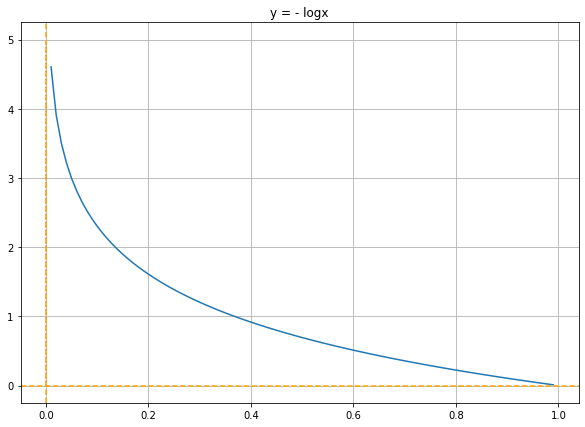

In [ ]:
x = np.arange(0, 1.0, 0.01) # -5.0부터 5.0까지 0.1 간격 생성
y = - np.log(x)

plt.figure(figsize=(10,7))
plt.grid()
plt.plot(x, y)
plt.plot([0,0],[0.0,5.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.axvline(x=0, color='orange', linestyle='--')
plt.title('y = - logx')
plt.show()

위의 그리에서 보듯 $-logx$의 값은 0에 가까워질수록 y값은 점점 커진다. 즉 정답을 추정한 확률값($y_k$)이 높으면 높을수록 교차 엔트로피 오차값은 작아지고, 반대로 정답 값을 낮게 추정하면 할수록 오차값이 크게 책정되는 것이다. 

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7 # 만약 y 값이 0이 들어갔을 때 np.log0이 되는데 이는 무한대의 값을 가지기 때문에 에러가 발생한다. 그래서 먼저 아주 작은 값 delta를 설정한다. 
    return -np.sum(t * np.log(y + delta)) # 애초에 완전 0 이 될 수 없도록 아주 작은값 delta를 넣어준다.

In [ ]:
# 4개 중 정답은 '2'
t = [0, 0, 1, 0]

# 예1 '2'일 확률이 가장 높다고 추정함
y1 = [0.1, 0.1, 0.6, 0.2]
print(cross_entropy_error(np.array(y1),t))

# 예2 '0'일 확률이 가장 높다고 추정함
y2 = [0.7, 0.1, 0.1, 0.1]
print(cross_entropy_error(np.array(y2),t))

0.510825457099338
2.302584092994546


### 4.2.3 미니배치 학습

빅데이터를 학습시킬때, 전체 로우 데이터를 한번에 전부 학습시키는 것보다, 데이터를 쪼개어서 **미니배치(mini-batch)**를 만든 후 여러번 학습 시키는 것이 더 효율적이다. 각 미니배치의 크기를 **배치사이즈(batch-size)**라고 하며, 각 배치가 한번 학습을 하는 것을 **반복(iteration)**이라고 한다. 그리고 전체 학습 데이터를 한번씩 모두 학습시켰을 때 1 **에포크(epoch)**가 증가한다.

MNIST 데이터셋을 통해 미니배치와 나뉘어진 배치의 학습 방법을 알아보자

In [ ]:
import sys, os
sys.path.append(os.pardir)
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, t_train), (X_test, t_test) = load_data(path='mnist.npz')
# X_train[1] = X_train[1].flatten()
X_train = X_train.reshape(60000,784) # 데이터를 연습하기 편하도록 28X28 형태에서 784로 변경
X_test = X_test.reshape(10000,784)

t_train = to_categorical(t_train,10) # 원핫 인코딩 형태 변경
t_test = to_categorical(t_test,10) # 

print(X_train.shape)
print(t_train.shape)
print(X_test.shape)
print(t_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [ ]:
# 미니배치 생성 - 무작위로 원하는 개수(10개) 꺼내기
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # np.random.choice(60000,10) 60000 미만의 수 중에서 무작위로 10개 뽑아내기 -> 인덱스로 사용
X_batch = X_train[batch_mask]
t_batch = t_train[batch_mask]
X_batch.shape

(10, 784)

In [ ]:
t_batch.ndim

2

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1 : # 입력되는 배열이 1차원일 경우 ndim: 차원의 수 반환
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0] # batch_size 를 반환
    return -np.sum(t * np.log(y)) / batch_size

In [ ]:
# 4개 중 정답은 '2'
t = [[0, 0, 1, 0],[0, 0, 1, 0]]

# 예1 '2'일 확률이 가장 높다고 추정함
y1 = [[0.1, 0.1, 0.6, 0.2],[0.1, 0.1, 0.6, 0.2]]
print(cross_entropy_error(np.array(y1),np.array(t)))

# 예2 '0'일 확률이 가장 높다고 추정함
y2 = [[0.7, 0.1, 0.1, 0.1],[0.7, 0.1, 0.1, 0.1]]
print(cross_entropy_error(np.array(y2),np.array(t)))

0.5108256237659907
2.3025850929940455


## 4.3 기울기(Gradient)

모든 변수의 편미분을 벡터화 한 것을 **기울기**라고 한다.  
이 기울기는 **각 지점에서 함수의 출력값을 가장 줄이는 방향**을 나타낸다.

### 4.3.1 경사 하강법(Gradient decent)

신경망에서 최적이란 **손실 함수가 최솟값이 될 때의 매개변수** 값을 찾는 것이다. 경사하강법은 기울기를 이용해 함수의 최솟값을 만드는 매개변수를 찾는 방법이다.  
이 기울어진 방향이 꼭 최솟값을 가르키는 것은 아니지만, 그 방향으로 가야 함수의 값을 줄일 수 있게 된다. 경사하강법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하고, 다음 이동한 곳에서 마찬가지로 나아가기를 반복한다.


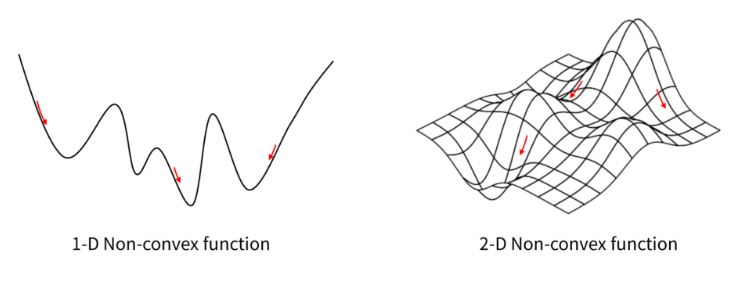
http://www.rootel.co.kr/machinelearning/blog17/


### 4.3.2 머신러닝에서의 경사하강법

이러한 경사하강법은 딥러닝에서 뿐만 아니라, 머신러닝에서도 사용되고 있다. 대표적으로 **Gradient Boosting, GBM** 모델이 대표적인 예라고 할 수 있다. GBM의 컨셉을 간략히 설명하자면 데이터에 대해 약한 학습기 M1이 학습을 하고 잔차 R1을 만들어 낸다. 이 R2를 학습하는 약한 학습기 M2를 만들어 학습을 시키고 잔차 R2를 만들어 낸다. 이런 방식을 반복하여 n번째 학습기Mn와 n번째 이제 매우 작아진 잔차 Rn을 구한 후 모든 학습기를 더하면 아래의 식이 된다.

$$
y = f(x_1)+f(x_2)+⋅⋅⋅+f(x_n) + R_n
$$

즉 잔차에 대해서, 잔차가 작아지는 방향으로 계속 학습을 해 나가는 것이다. GBM에 대해 아래 블로그에서 자주 잘 설명해주고 있다.

https://yngie-c.github.io/machine%20learning/2021/03/21/gbm/

현재 우리들이 좋은 모델이라고 알려진 lightGBM, XGBoost 등 대부분의 머신러닝 학습모델이 이런 컨셉의 경사하강법을 도입한 학습기이다.

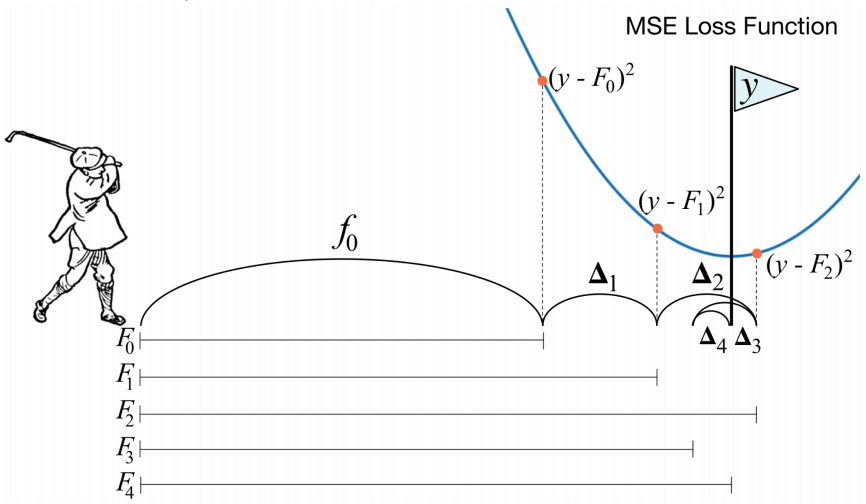
https://github.com/topics/gradient-boosting-machine


### 4.3.3 